In [1]:
# import libraries
from DNN.wave_multiplex import Manager
from models.wave_multiplex import D2NNmodel
from helper import *

In [2]:
n_layers = 3
n_multiplexing = 10
binning_factor = 4
n_size_per_layer = 100
distance_constant = 0.02
pixel_pitch = 400e-6
lambd_mean = 0.8e-3
lambd_op = 0.9125 * lambd_mean
lambd_ed = 1.0875 * lambd_mean 
n_padding = 50
lr = 1e-3
batch_size = 8
whether_load_model = False
load_model_name = 'saved_model/07_20_2024.pth'
n_dataset_per_wavelength = 10_000
input_fov = 5
fov_padd = 40
output_fov = input_fov
hmin = 0.25 * lambd_mean
hmax = 1.5 * lambd_mean
bit_depth = 8
transform_dimension = (input_fov * input_fov)
lambd_list = np.linspace(lambd_op,lambd_ed,n_multiplexing)
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
torch.manual_seed(42)
target_transform_matrices, tr_dataloaders , te_dataloaders\
    = loader_list_generation(n_dataset_per_wavelength, n_multiplexing, input_fov, batch_size)

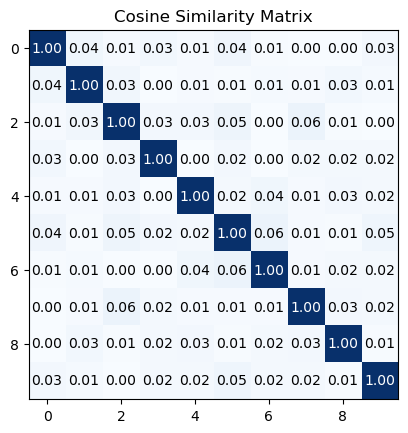

In [4]:
fig = plot_cosine_similarity_matrix(target_transform_matrices)

In [5]:
model = D2NNmodel(pixel_pitch, distance_constant, n_padding, device, lambd_list, n_size_per_layer, 0, input_fov, binning_factor)
loss_fn = mse_loss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [6]:
manager = Manager(model, loss_fn, optimizer)
manager.set_loaders(tr_dataloaders, te_dataloaders)
# tracking, fig = manager.lr_range_test(train_dataloader, end_lr=1e-1, num_iter=100)
if whether_load_model:
    manager.load_checkpoint(load_model_name, None)

In [14]:
manager.train(3)

In [15]:
# manager.save_checkpoint('saved_model/07_20_2024.pth')

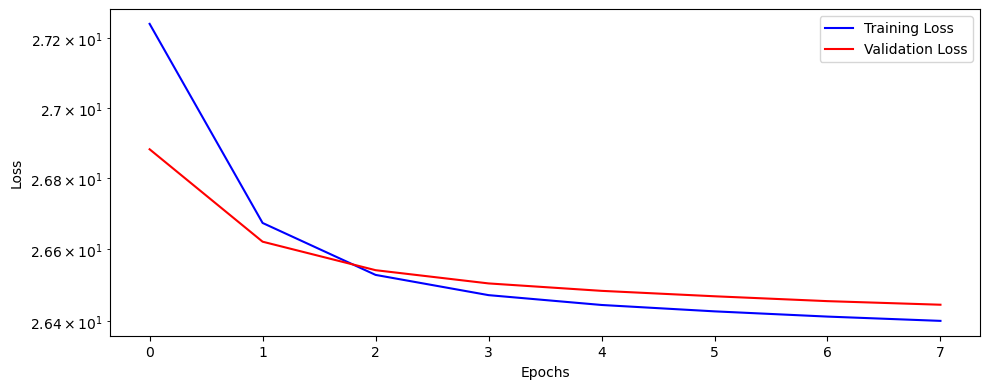

In [16]:
fig = manager.plot_losses()

In [10]:
layers_name = ['modulation_1', 'modulation_2', 'modulation_3']
fig_mask = manager.visualize_height_mask(layers_name, hmin, hmax, bit_depth)

RuntimeError: indices should be either on cpu or on the same device as the indexed tensor (cpu)

In [ ]:
layers_to_hook = ['modulation_1', 'modulation_2', 'modulation_3']
images_batch, labels_batch = next(iter(te_dataloaders[0]))
manager.attach_hooks(layers_to_hook)
logits = manager.predict(images_batch)
manager.remove_hooks()

fig = manager.visualize_outputs(layers_to_hook, n_neuron, n_padd, n_images=6, y=None, yhat=None)

In [ ]:
# To be continued ...